In [51]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

file_path = "/content/drive/MyDrive/ObesityDataSet.csv"


Mounted at /content/drive


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv(file_path, names=col_names, na_values='?', skipinitialspace=True)

In [54]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
1,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
2,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
4,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          2090 non-null   object
 1   Age                             2090 non-null   object
 2   Height                          2090 non-null   object
 3   Weight                          2093 non-null   object
 4   family_history_with_overweight  2092 non-null   object
 5   FAVC                            2090 non-null   object
 6   FCVC                            2094 non-null   object
 7   NCP                             2090 non-null   object
 8   CAEC                            2094 non-null   object
 9   SMOKE                           2099 non-null   object
 10  CH2O                            2097 non-null   object
 11  SCC                             2089 non-null   object
 12  FAF                             2093 non-null   

In [56]:
df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2090,2090,2090,2093,2092,2090,2094,2090,2094,2099,2097,2089,2093,2097,2094,2100,2112
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,8
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [57]:
numeric_cols = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

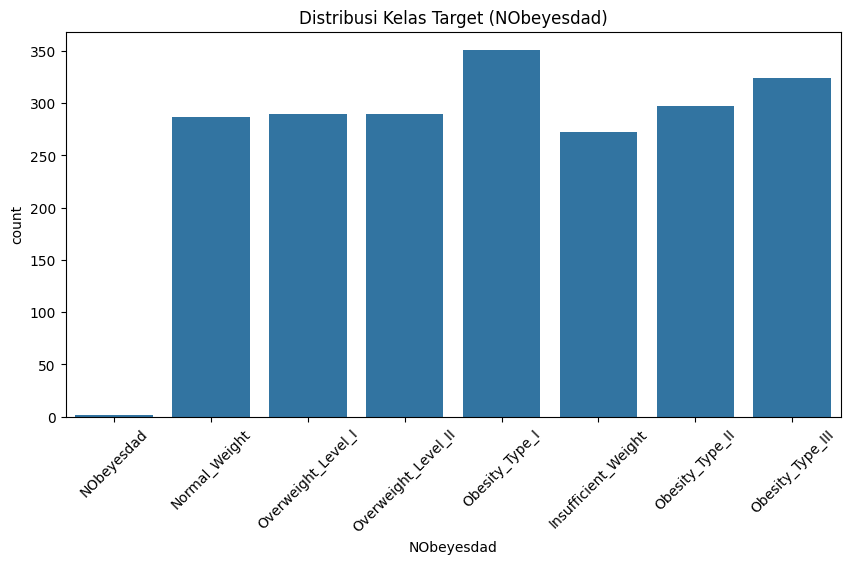

In [58]:
# 3. Visualisasi data
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='NObeyesdad')
plt.title('Distribusi Kelas Target (NObeyesdad)')
plt.xticks(rotation=45)
plt.show()

In [59]:
#  Cek missing values
df.isnull().sum()

,0
Gender,22
Age,2112
Height,23
Weight,20
family_history_with_overweight,20
FAVC,22
FCVC,18
NCP,23
CAEC,18
SMOKE,13


In [60]:
#  Nilai unik per kolom
df.nunique()

,0
Gender,1394
Age,0
Height,1561
Weight,1517
family_history_with_overweight,5
FAVC,3
FCVC,808
NCP,636
CAEC,3
SMOKE,3


In [61]:
# Cek data duplikat
duplicates = df.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")


Jumlah data duplikat: 18


In [62]:
# Cek keseimbangan kelas target
print("\n=== Distribusi kelas target ===")
print(df['NObeyesdad'].value_counts())


=== Distribusi kelas target ===
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
NObeyesdad               1
Name: count, dtype: int64


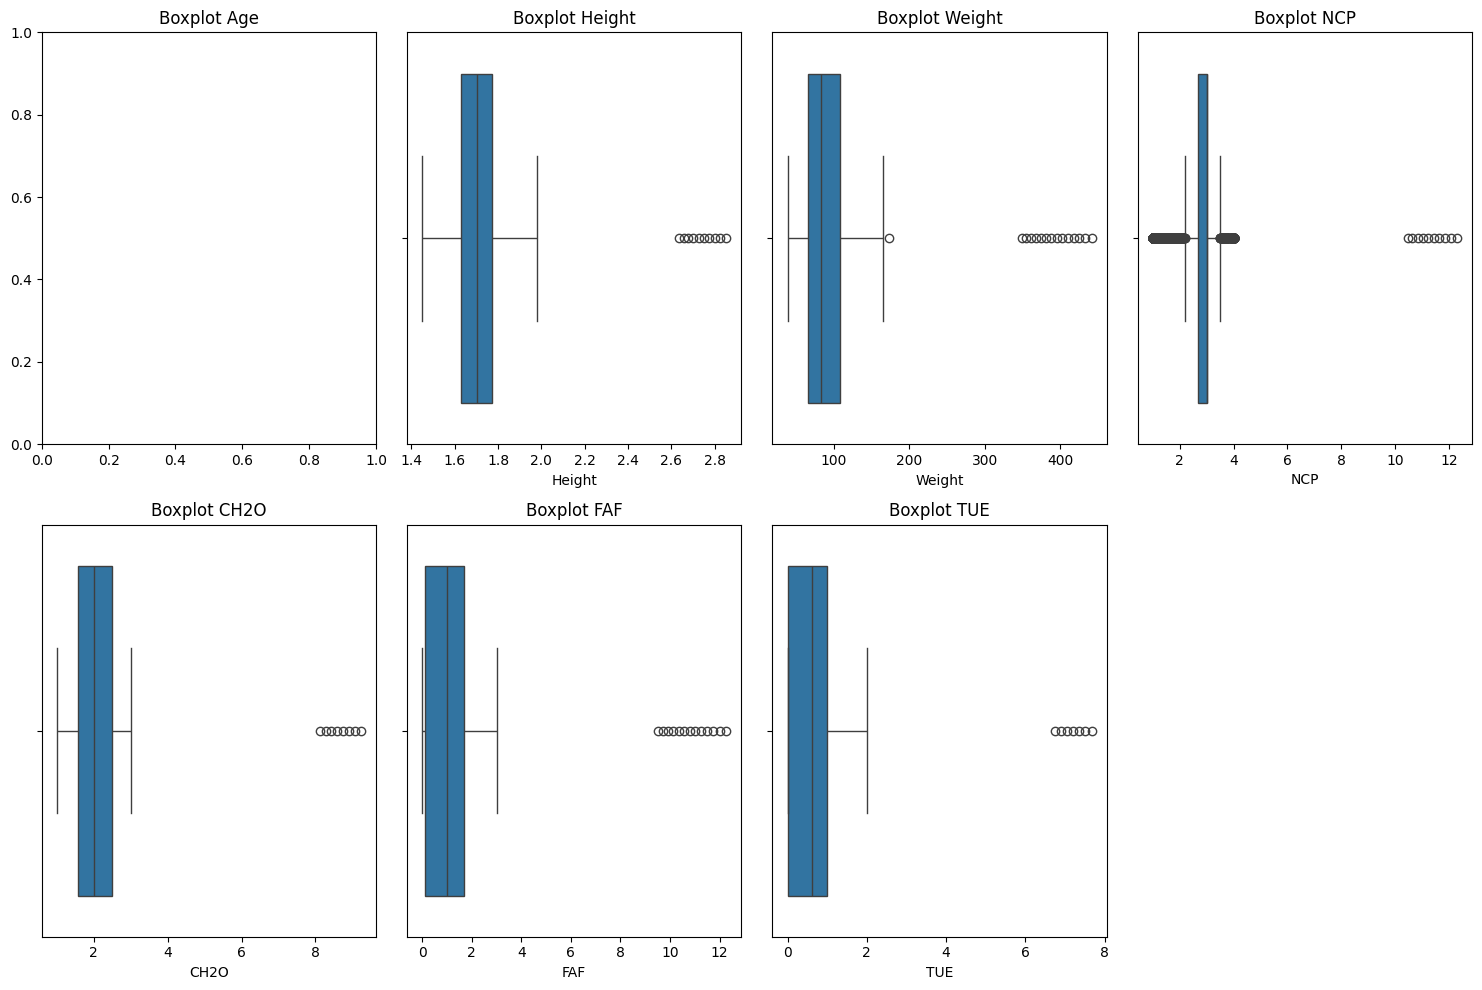

In [64]:
# %%
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2,4,i+1)
    # Drop missing values from the column before plotting
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()